In [45]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END


In [46]:
class AgentState(TypedDict):
    """
    This class represents the state of the agent in the conversation.
    """
    number1: int
    number2: int
    operation: str
    result: int


In [47]:
def adder(state: AgentState) -> AgentState:
    """
    This function performs addition on the two numbers in the state.
    """
    state["result"] = state["number1"] + state["number2"]
    return state


In [48]:
def subtractor(state: AgentState) -> AgentState:
    """
    This function performs subtraction on the two numbers in the state.
    """
    state["result"] = state["number1"] - state["number2"]
    return state


In [49]:
def decide_next_node(state: AgentState) -> AgentState:
    """
    This function decides the next node based on the operation specified in the state.
    """
    if state["operation"] == "+":
        return "addition_operation"
    elif state["operation"] == "-":
        return "subtraction_operation"
    else:
        raise ValueError("Unknown operation")

In [50]:
workflow = StateGraph(AgentState)

workflow.add_node("add_node", adder)
workflow.add_node("subtract_node", subtractor)
workflow.add_node("router", lambda state: state)

workflow.add_node("add_node_2", adder)
workflow.add_node("subtract_node_2", subtractor)
workflow.add_node("router_2", lambda state: state)

In [51]:
workflow.add_edge(START, "router")

workflow.add_conditional_edges(
    "router",
    decide_next_node, 
    {
        "addition_operation": "add_node",
        "subtraction_operation": "subtract_node"
    }
)

workflow.add_edge("add_node", "router_2")
workflow.add_edge("subtract_node", "router_2")

workflow.add_conditional_edges(
    "router_2",
    decide_next_node, 
    {
        "addition_operation_2": "add_node_2",
        "subtraction_operation_2": "subtract_node_2"
    }
)

workflow.add_edge("add_node_2", END)
workflow.add_edge("subtract_node_2", END)

app = workflow.compile()

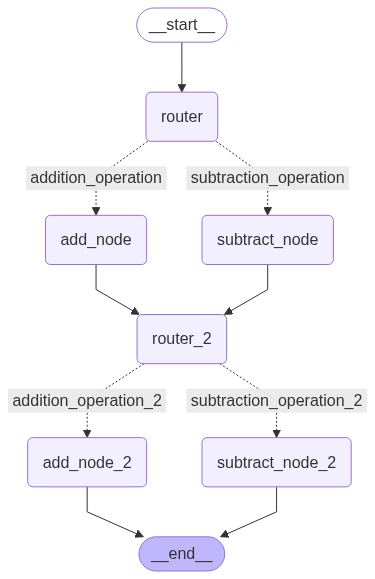

In [52]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [37]:
state1 = AgentState(number1=10, number2=5,  operation = '+')
print(app.invoke(state1))

{'number1': 10, 'number2': 5, 'operation': '+', 'result': 15}
